# SEED-V Dataset
In this notebook, we test the dataset, different splitting algoirthms for training, as well as visualize some samples from the dataset.

In [1]:
import matplotlib.pyplot as plt
from datasets.seedv import SeedVDataset
from datasets.splitters import RandomSplitter, LNSOSplitter, KFoldSplitter
from torch.utils.data import DataLoader

In [2]:
dataset = SeedVDataset(
    root_dir='C:\\Users\\adi\\Documents\\SEED-V\\',
    h5file='seedv12s50o.h5',
    participants=[1, 2],             
    sessions=[1, 2, 3],               
    emotions=[0, 1, 2, 3, 4],       
)

In [3]:
data_id = dataset.data_ids[0]
data_id_index = dataset.data_ids.index(data_id)
data, label = dataset[data_id_index]

print("Length of Dataset:", len(dataset))
print("Data_ID:", data_id)
print("Data:", data)

Length of Dataset: 2149
Data_ID: 1_1_1_26400
Data: tensor([[ 0.2470, -0.1260, -0.0211,  ..., -0.0233,  0.2164, -0.1088],
        [-0.2820, -0.5152, -0.5874,  ..., -0.2412, -0.2293, -0.4747],
        [-0.6901, -0.6783, -0.7636,  ..., -0.5682, -0.6342, -0.5180],
        ...,
        [-0.8123, -0.6845, -0.0902,  ...,  0.0615,  0.1063,  0.2236],
        [-0.7445, -0.6573, -0.4991,  ...,  0.5374,  0.4083,  0.5115],
        [-0.3666, -0.1948,  0.0102,  ...,  0.0778, -0.0418, -0.0244]])


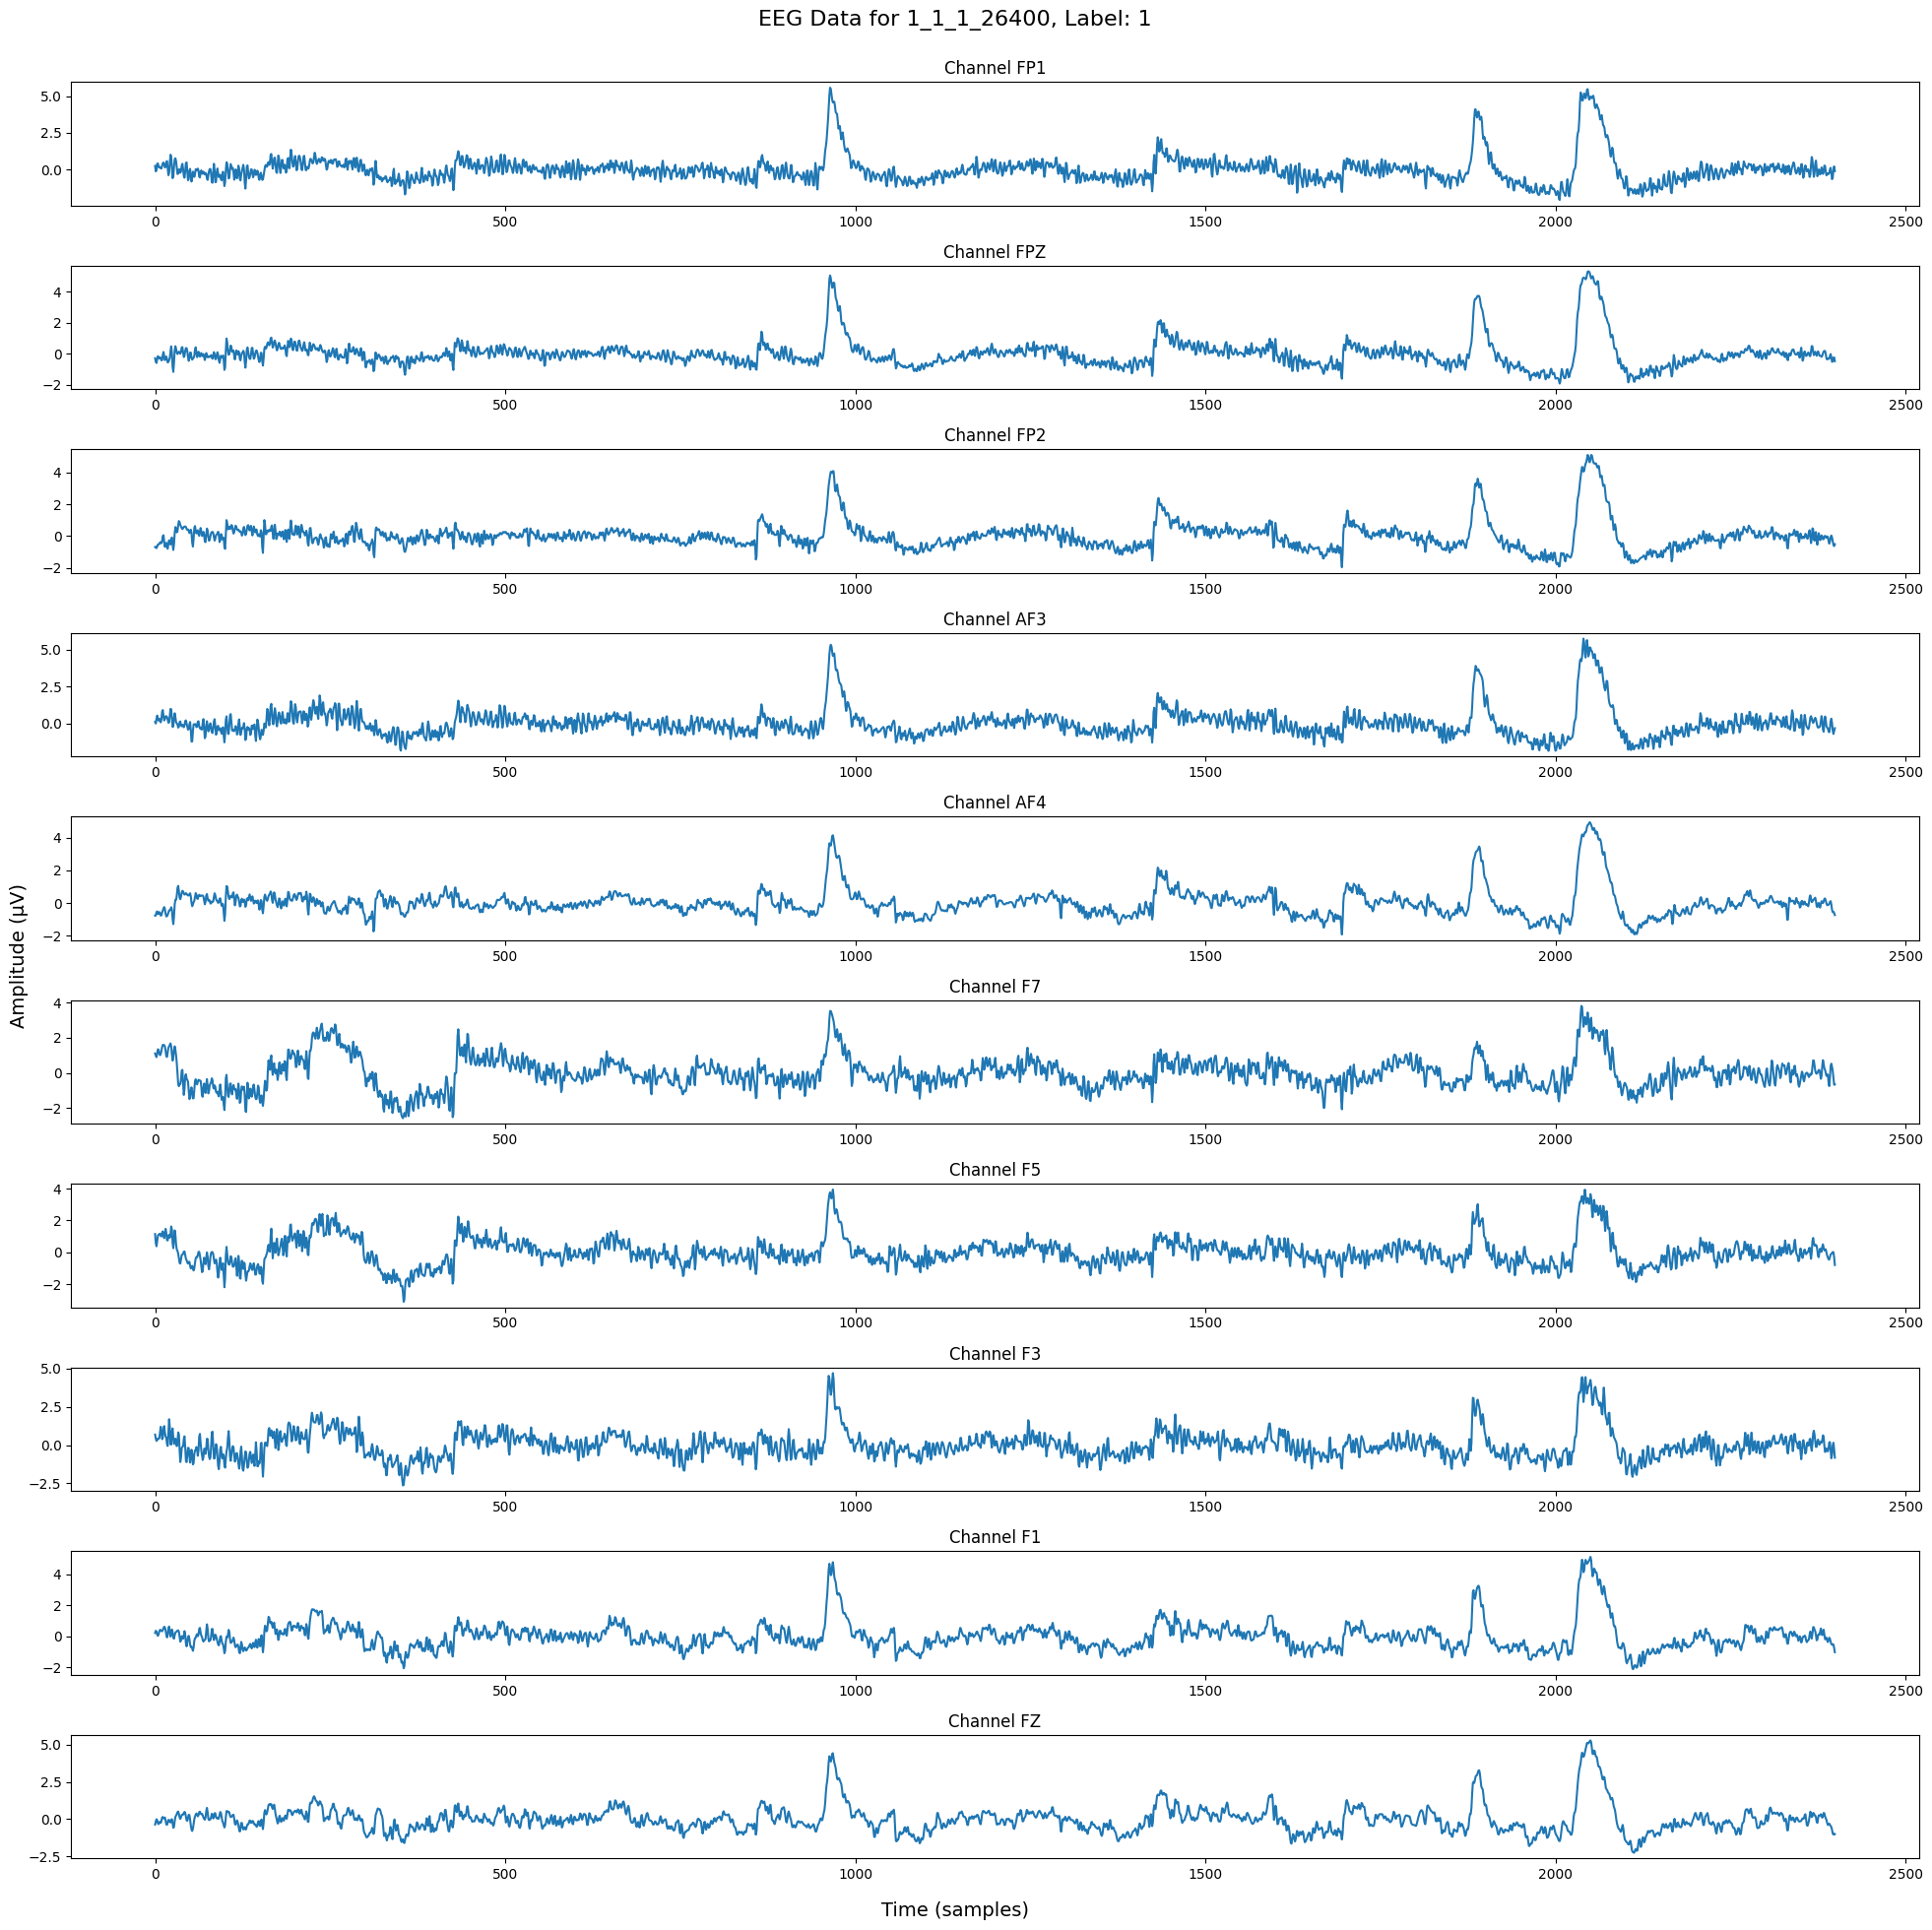

In [4]:
# Plot the 10 channels of the first data_id (participant_session_label) 

channel_names = ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'CB1', 'O1', 'OZ', 'O2', 'CB2']
no_of_channels = 10
fig, axs = plt.subplots(no_of_channels, 1, figsize=(20, 20))

data_id = dataset.data_ids[0]
data_id_index = dataset.data_ids.index(data_id)
data, label = dataset[data_id_index]

# Plot each channel on a separate subplot
for i in range(no_of_channels):  # Loop over the first n channels
    axs[i].plot(data[i].numpy())  # Plot the i-th channel
    axs[i].set_title(f'Channel {channel_names[i]}')

fig.suptitle(f'EEG Data for {data_id}, Label: {label}', fontsize=16)
fig.supxlabel('Time (samples)', fontsize=14)
fig.supylabel('Amplitude (µV)', fontsize=14)

plt.tight_layout(rect=[0.005, 0.005, 1, 0.98])  # Leave space for global labels and title
plt.show()

## Split test
### Random Splitter

In [5]:
random_split = RandomSplitter(
    dataset=dataset,
    train_ratio=0.8,
    shuffle=True
)

rs_trainset = random_split.trainset
rs_testset = random_split.testset

In [6]:
assert len(dataset) == len(rs_trainset) + len(rs_testset)
len(dataset), len(rs_trainset), len(rs_testset)

(2149, 1719, 430)

### Leave N Subjects Out (LNSO) Splitter

In [8]:
lnso_split = LNSOSplitter(
    dataset=dataset,
    num_participants=1,
)

lnso_trainset = lnso_split.trainset
lnso_testset = lnso_split.testset

In [9]:
assert len(dataset) == len(lnso_trainset) + len(lnso_testset)
len(dataset), len(lnso_trainset), len(lnso_testset)

(2149, 1151, 998)

### K-fold Splitter

In [10]:
k = 10
kfold_split = KFoldSplitter(
    dataset=dataset,
    k=k,
    shuffle=True
)

for i in range(k):
    kfold_split.set_fold(i)
    kfold_trainset = kfold_split.trainset
    kfold_testset = kfold_split.testset

    assert len(dataset) == len(kfold_trainset) + len(kfold_testset)
    print(len(kfold_trainset), len(kfold_testset))

1934 215
1934 215
1934 215
1934 215
1934 215
1934 215
1934 215
1934 215
1934 215
1935 214
